# Versuch 1: Statistik I: Würfel-Simulation

In [30]:
#Name: Finn Jannik Wagner
#Matrikelnummer: 8102237
#E-Mail-Adresse: finn.jannik.wagner@physik.uni-giessen.de
#Studiengang: Physik
#Wiederholen Sie das Praktikum (Ja/Nein)? Nein

#Name: Finn Henrik Bietz
#Matrikelnummer: 8104485
#E-Mail-Adresse: finn.henrik.bietz@physik.uni-giessen.de
#Studiengang: Physik 
#Wiederholen Sie das Praktikum (Ja/Nein)? Nein

Die folgenden Aufgaben basieren auf der Generierung von (Pseudo-)Zufallszahlen am Computer. Daher liefert ein mehrfaches Ausführen der Versuche unterschiedliche Werte. Führen Sie den Code jeder einzelnen Aufgabe daher mindestens dreimal aus und dokumentieren Sie die Ergebnisse. Nutzen Sie dann (wie auch bei Experimenten im Labor) den Mittelwert und die Standardabweichung, wenn Sie die Fragen in Ihrem Protokoll beantworten.

##### Aufgabenstellung: 
Für die folgenden Aufgaben werden die Ergebnisse von Würfelwürfen untersucht. <br><br>
a) Berechnen Sie zunächst (auf Papier) den Erwartungswert, sowie die Standardabweichung eines 6-seitigen Würfels, für die Augensumme von i) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
b) Berechnen Sie zunächst den Erwartungswert, sowie die Standardabweichung eines 20-seitigen Würfels, für i) die Augenzahl eines Würfels, sowie für die Augensumme von ii) zwei iii) fünf und iv) zehn Würfeln.  <br><br>
c) Simulieren Sie mit Hilfe der Funktion dice(n, m = 1, k = 20, save = "example") ein Zufallsexperiment. Dabei soll ein 20-seitiger Würfel i) $n = 100$ mal, ii) $n = 1000$ und iii) $n = 10000$ mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil b). <br><br>
d) Simulieren Sie mit Hilfe der Funktion dice(n=1000, m, k=20, save = "example") ein Zufallsexperiment. Dabei sollen i) zwei, ii) fünf und iii) zehn 20-seitige Würfel je 1000 mal geworfen werden. Vergleichen Sie jeweils den Mittelwert und die empirische Standardabweichung mit dem Erwartungswert und der Standardabweichung aus Teil a). <br><br>
e) Interpretieren Sie Ihre Ergebnisse. Entsprechen Sie Ihren Erwartungen?  <br><br>
f) Führen Sie mit den Werten aus d) mit Hilfe der Funktion chi_squared(x = points, sigma, mu, save = "example") einen Fit durch. Dabei wird eine Gaußfunktion als theoretische Funktion verwendet. Vergleichen sie die $\chi ^2$ Werte. Welcher Wert ist besonders hoch/gering und woran könnte das liegen? <br><br>
g) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels i) mindestens einmal die 20 fällt? ii) höchstens 2 mal die 1 fällt? iii) genau 3 mal die 5 fällt? iv) genau 3 mal die 5 UND höchstens 2 mal die 1 (Tipp: Baumdiagramm kann helfen)


##### Bemerkung: 
Sie können gerne auch mit anderen Werten herumspielen, um ein besseres Gefühl für die Zusammenhänge zu bekommen. Verwenden Sie in diesem Fall die entsprechende Funktion ohne das save-Argument, also dice(n, m, k) anstatt dice(n, m, k, save). Für die Auswertung sind der Werte aus der Aufgabenstellung relevant.

##### Speichern: 
In Ihrem Browser über Drucken->Print as PDF (Speichern als PDF)

In [31]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
import math

In [32]:
def dice (n, m, k, save = False):                                       
    
    """
    dice(n, m, k, save) 
    n = Anzahl der Würfelwürfe (Integer), 
    m = Anzahl der Würfel (Integer), 
    k = Anzahl der Würfelseiten (Integer) 
    save = Name des PDFs (String)
    
    Funktion plottet Histogramm eines simulierten Würfelexperiments, inklusive Markierung für den Mittelwert
    und gibt den Array, den Mittelwert und die Standardabweichung der 
    Augensummen aus. Zumdem wird ein PDF erstellt, falls save übergeben wird
    """
    m1 = m
    k1 = k
    dice_matrix=np.array([])                                            #leeres Array zum Auffüllen
    for i in range (n):
        dice_row=np.array([])
        for j in range (m):
            dice_row=np.append(dice_row,[rnd.randint(1,k+1)])           #m-er Reihe wird erzeugt. Gefüllt durch Randoms
        dice_matrix= np.append(dice_matrix,[dice_row])                  #n-te m-er Reihe wird dem Array hinzugefügt
    dice_sum = sum(dice_matrix.reshape(n,m).transpose())                #Summe der Augenzahlen
    plt.hist(dice_sum, bins = (k-1)*m+1, 
             range = (m, m*k), color = 'limegreen' , density = True)    #Histogram mit relativen Häufigkeit
    plt.axvline(np.mean(dice_sum),color='black' ,linestyle='--')        #vertikale Linie des Mittelwertes
    plt.xlabel("Augenzahl")                                             #Bezeichnung x-Achse
    plt.ylabel("Relative Häufigkeit")                                   #Bezeichnung y-Achse
    if (save != False):                                                 #wenn save ein String s ist, wird ein PDF mit dem Namen s gespeichert
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()                                                          #Plot
    print ("Arithmetisches Mittel: ", np.mean(dice_sum), "\nEmpirische Standardabweichung: ", np.std(dice_sum) )              
    return (dice_sum, np.mean(dice_sum), np.std(dice_sum), k1, m1 )             #Array, Mittelwert und Standardabweichung der Augensummen


def gauss(sigma, mu, x):
    a = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5* (x - mu)**2 /sigma**2)
    return a   

def chi_squared(y, sigma, mu, save = False):
    x = y[0]
    k = y[3]
    m = y[4]
    A = plt.hist(x, bins = np.arange(m,m*k+2), density = True)
    a= sum((((gauss(sigma, mu, A[1][:-1]) - A[0]) **2) /gauss(sigma, mu, A[1][:-1])))
    plt.plot(np.linspace(0, m*k+2, 1000), gauss(sigma, mu, np.linspace(0, m*k+2, 1000)), 'r')
    plt.xlabel("Augenzahl")
    plt.ylabel("Relative Häufigkeit")
    if (save != False):
        plt.title(save)
        plt.savefig(save+'.pdf')
    plt.show()
    print("chi-Quadrat:", a )
    pass


# Aufgabe 1a)
Erwartungswerte von 6-seitigen Würfeln
## 1 Würfel:
Alle 6 Werte des Würfels sind gleich wahrscheinlich mit der Wahrscheinlichkeit 1/6. <br>
Der Erwartungswert $µ$ ist damit $1*1/6 + 2 * 1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6 = µ = 3.5$ <br>
Die Standardabweichung ist $math.sqrt(1/6*(3.5 - 1)**2 + 1/6*(3.5 - 2)**2 + 1/6*(3.5 - 3)**2 + 1/6*(3.5 - 4)**2 + 1/6*(3.5 - 5)**2 + 1/6*(3.5 - 6)**2) = math.sqrt(17.5/6) ≈ 1.71$
    
## 2 Würfel:
Da einzelne Würfelwürfe unabhängig von einander sind und für den Erwartungswert Linearität gilt, ist der Erwartungswert für $n$ Würfel $n*3.5$ <br>
In diesem Fall also $µ = 2*3.5 = 7$
    
Die Standardabweichung ist: <br>
$math.sqrt( 1/36*(7 - 2)**2 + 2/36*(7 - 3)**2 + 3/36*(7 - 4)**2 + 4/36*(7 - 5)**2 + 5/36*(7 - 6)**2 + 6/36*(7 - 7)**2 + 5/36*(7 - 8)**2 + 4/36*(7 - 9)**2 + 3/36*(7 - 10)**2 + 2/36*(7 - 11)**2 + 1/36*(7 - 12)**2) = math.sqrt(35/6) = math.sqrt(2 * 17.5/6) ≈ 2.42$ <br>
Für die Varianz gilt bei unabhängigen Würfelwürfen ebenfalls Linearität, diese lässt sich da die Wurzelfunktion monoton ist auch auf die Standardabweichung übertragen. <br>
Die Standardabweichung für zwei Würfel ist die eines Würfels mal den Faktor $math.sqrt(2)$.
    
## 5 Würfel:
Erwartungswert µ = 5*3.5 = 17.5 <br>
Standardabweichung σ = math.sqrt(5 * 17.5/6) ≈ 3.82
    
## 10 Würfel:
Erwartungswert µ = 10*3.5 = 35 <br>
Standardabweichung σ = math.sqrt(10 * 17.5/6) ≈ 5.4

# Aufgabe 1b)

Wir nehmen an das sich bei dem Würfel um einen Ikosaeder handelt, alle Seiten also die gleiche Wahrscheinlichkeit 1/20 haben.

## 1 Würfel:
Der Erwartungswert ist damit $µ = 1*1/20 + 2*1/20 + 3*1/20 + ... = 1/20 * (1+2+3+...) = (20+1)/2 * 20 * 1/20 = 21/2 = 10.5$ <br>
Die Standardabweichung ist $σ = math.sqrt(1/20 * sum([(10.5 - i)**2 $for i in range$(1, 20+1)])) = math.sqrt(133/4) ≈ 5.77$ <br>

Äquivalent zu einem 6 seitigen Würfel lassen sich Erwartungswert und Standardabweichung für mehrere Würfe auf Grund von Monotonie einfach bestimmen.

## 2 Würfel:
Erwartungswert $µ = 2*10.5 = 21$ <br>
Standardabweichung $σ = math.sqrt(2 * 133/4) ≈ 8.15$
    
## 5 Würfel:
Erwarungswert $µ = 5*10.5 = 52.5$ <br>
Standardabweichung $σ = math.sqrt(5 * 133/4) ≈ 12.89$

## 10 Würfel:
Erwarungswert $µ = 10*10.5 = 105$ <br>
Standardabweichung $σ = math.sqrt(10 * 133/4) ≈ 18.23$

Drei Zufallsexperimente mit 100 Würfelwürfen mit einem 20-seitigen Würfel


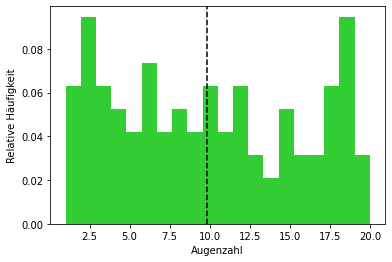

Arithmetisches Mittel:  9.84 
Empirische Standardabweichung:  6.07078248663218


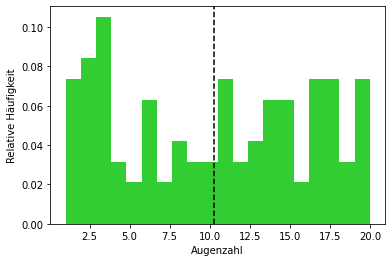

Arithmetisches Mittel:  10.27 
Empirische Standardabweichung:  6.29262266467647


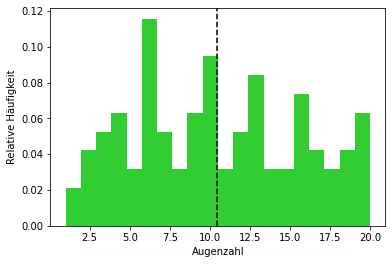

Arithmetisches Mittel:  10.47 
Empirische Standardabweichung:  5.4340684574267195
Drei Zufallsexperimente mit 1000 Würfelwürfen mit einem 20-seitigen Würfel


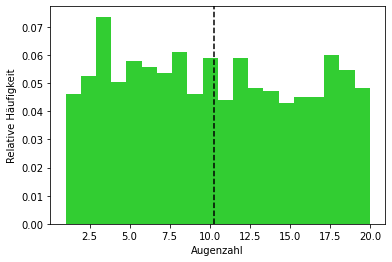

Arithmetisches Mittel:  10.246 
Empirische Standardabweichung:  5.77576696205794


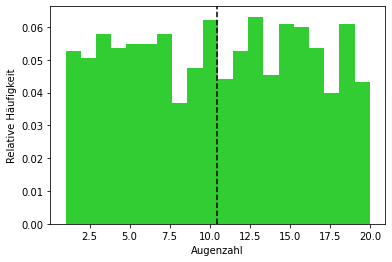

Arithmetisches Mittel:  10.446 
Empirische Standardabweichung:  5.741696961700434


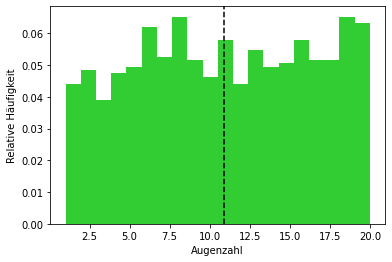

Arithmetisches Mittel:  10.877 
Empirische Standardabweichung:  5.749597464170861
Drei Zufallsexperimente mit 10000 Würfelwürfen mit einem 20-seitigen Würfel


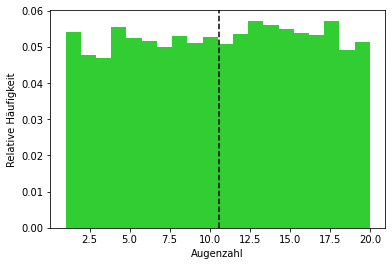

Arithmetisches Mittel:  10.5955 
Empirische Standardabweichung:  5.732632881146324


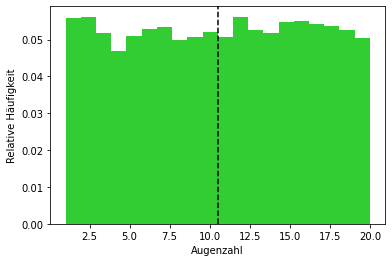

Arithmetisches Mittel:  10.5183 
Empirische Standardabweichung:  5.785781287777823


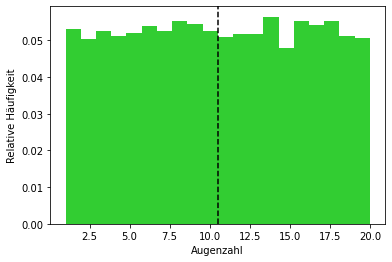

Arithmetisches Mittel:  10.5156 
Empirische Standardabweichung:  5.747830602931857


In [33]:
#Aufgabe 1c)

print(f'Drei Zufallsexperimente mit {100} Würfelwürfen mit einem {20}-seitigen Würfel')
dice1_1 = dice(n=100, m=1, k=20) #Ergebnisse für 100 Würfe
dice1_2 = dice(n=100, m=1, k=20)
dice1_3 = dice(n=100, m=1, k=20)

print(f'Drei Zufallsexperimente mit {1000} Würfelwürfen mit einem {20}-seitigen Würfel')
dice2_1 = dice(n=1000, m=1, k=20) #Ergebnisse für 1000 Würfe
dice2_2 = dice(n=1000, m=1, k=20)
dice2_3 = dice(n=1000, m=1, k=20)

print(f'Drei Zufallsexperimente mit {10000} Würfelwürfen mit einem {20}-seitigen Würfel')
dice3_1 = dice(n=10000, m=1, k=20) #Ergebnisse für 10000 Würfe
dice3_2 = dice(n=10000, m=1, k=20)
dice3_3 = dice(n=10000, m=1, k=20)

In [34]:
# Berechnen Sie den Mittelwert für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

#Auswertung Mittelwert für 100 Würfe:
mw1 = (dice1_1[1] + dice1_2[1] + dice1_3[1]) / 3
s1 = (dice1_1[2] + dice1_2[2] + dice1_3[2]) / 3
theo_mw = 10.5
theo_s =  math.sqrt(133/4)

abw_mw1 = abs( mw1/theo_mw - 1 ) * 100
abw_s1 = abs( s1/theo_s - 1 ) * 100

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {100} Würfen eines 20 seitigen Würfels sind: {dice1_1[1]}, {dice1_2[1]}, {dice1_3[1]}')
print(f'Die drei experimentellen Werte für die Standardabweichung bei {100} Würfen eines 20 seitigen Würfels sind: {dice1_1[2]:.4f}, {dice1_2[2]:.4f}, {dice1_3[2]:.4f}')
print(f'Die Mittelwerte der experimentellen Ergebnisse bei {100} Würfen:')
print(f'\tMittelwert der experimentellen arithmetischen Mittelwerte: {mw1:.4f}')
print(f'\tMittelwert der experimentellen Empirischen Standardabweichungen: {s1:.4f}')
print(f'\tDas arithmetische Mittel weicht um {abw_mw1:.4f} % von dem berechneten Erwartungswert ab')
print(f'\tDie Empirische Standardabweichung weicht um {abw_s1:.4f} % von der errechneten Standardabweichung ab')

Die drei experimentellen Werte für das arithmetische Mittel bei 100 Würfen eines 20 seitigen Würfels sind: 9.84, 10.27, 10.47
Die drei experimentellen Werte für die Standardabweichung bei 100 Würfen eines 20 seitigen Würfels sind: 6.0708, 6.2926, 5.4341
Die Mittelwerte der experimentellen Ergebnisse bei 100 Würfen:
	Mittelwert der experimentellen arithmetischen Mittelwerte: 10.1933
	Mittelwert der experimentellen Empirischen Standardabweichungen: 5.9325
	Das arithmetische Mittel weicht um 2.9206 % von dem berechneten Erwartungswert ab
	Die Empirische Standardabweichung weicht um 2.8824 % von der errechneten Standardabweichung ab


In [35]:
#Auswertung Mittelwert für 1000 Würfe:
mw2 = (dice2_1[1] + dice2_2[1] + dice2_3[1]) / 3
s2 = (dice2_1[2] + dice2_2[2] + dice2_3[2]) / 3

abw_mw2 = abs( mw2/theo_mw - 1 ) * 100
abw_s2 = abs( s2/theo_s - 1 ) * 100

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {1000} Würfen eines 20 seitigen Würfels sind: {dice2_1[1]}, {dice2_2[1]}, {dice2_3[1]}')
print(f'Die drei experimentellen Werte für die Standardabweichung bei {1000} Würfen eines 20 seitigen Würfels sind: {dice2_1[2]:.4f}, {dice2_2[2]:.4f}, {dice2_3[2]:.4f}')
print(f'Die Mittelwerte der experimentellen Ergebnisse bei {1000} Würfen:')
print(f'\tMittelwert der experimentellen arithmetischen Mittelwerte: {mw2:.4f}')
print(f'\tMittelwert der experimentellen Empirischen Standardabweichungen: {s2:.4f}')
print(f'\tDas arithmetische Mittel weicht um {abw_mw2:.4f} % von dem berechneten Erwartungswert ab')
print(f'\tDie Empirische Standardabweichung weicht um {abw_s2:.4f} % von der errechneten Standardabweichung ab')

Die drei experimentellen Werte für das arithmetische Mittel bei 1000 Würfen eines 20 seitigen Würfels sind: 10.246, 10.446, 10.877
Die drei experimentellen Werte für die Standardabweichung bei 1000 Würfen eines 20 seitigen Würfels sind: 5.7758, 5.7417, 5.7496
Die Mittelwerte der experimentellen Ergebnisse bei 1000 Würfen:
	Mittelwert der experimentellen arithmetischen Mittelwerte: 10.5230
	Mittelwert der experimentellen Empirischen Standardabweichungen: 5.7557
	Das arithmetische Mittel weicht um 0.2190 % von dem berechneten Erwartungswert ab
	Die Empirische Standardabweichung weicht um 0.1837 % von der errechneten Standardabweichung ab


In [36]:
#Auswertung Mittelwert für 10000 Würfe:
mw3 = (dice3_1[1] + dice3_2[1] + dice3_3[1]) / 3
s3 = (dice3_1[2] + dice3_2[2] + dice3_3[2]) / 3

abw_mw3 = abs( mw3/theo_mw - 1 ) * 100
abw_s3 = abs( s3/theo_s - 1 ) * 100

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {10000} Würfen eines 20 seitigen Würfels sind: {dice3_1[1]}, {dice3_2[1]}, {dice3_3[1]}')
print(f'Die drei experimentellen Werte für die Standardabweichung bei {10000} Würfen eines 20 seitigen Würfels sind: {dice3_1[2]:.4f}, {dice3_2[2]:.4f}, {dice3_3[2]:.4f}')
print(f'Die Mittelwerte der experimentellen Ergebnisse bei {10000} Würfen:')
print(f'\tMittelwert der experimentellen arithmetischen Mittelwerte: {mw3:.4f}')
print(f'\tMittelwert der experimentellen Empirischen Standardabweichungen: {s3:.4f}')
print(f'\tDas arithmetische Mittel weicht um {abw_mw3:.4f} % von dem berechneten Erwartungswert ab')
print(f'\tDie Empirische Standardabweichung weicht um {abw_s3:.4f} % von der errechneten Standardabweichung ab')
print()
print('Die Genauigkeit der Experimente steigt (meistens) mit größerer Anzahl an Würfen:')
print(f'\t{100}   Würfe: Mittelwertabweichung: {abw_mw1:.4f}, Standardabweichungabweichung {abw_s1:.4f}')
print(f'\t{1000}  Würfe: Mittelwertabweichung: {abw_mw2:.4f}, Standardabweichungabweichung {abw_s2:.4f}')
print(f'\t{10000} Würfe: Mittelwertabweichung: {abw_mw3:.4f}, Standardabweichungabweichung {abw_s3:.4f}')
print('Eine Menge von Zufallsexperiment nähert sich also den theoretischen Werten, je mehr Zufallsexperimente man ausführt')
# TODO Stimmt für letzte Durchführung?

Die drei experimentellen Werte für das arithmetische Mittel bei 10000 Würfen eines 20 seitigen Würfels sind: 10.5955, 10.5183, 10.5156
Die drei experimentellen Werte für die Standardabweichung bei 10000 Würfen eines 20 seitigen Würfels sind: 5.7326, 5.7858, 5.7478
Die Mittelwerte der experimentellen Ergebnisse bei 10000 Würfen:
	Mittelwert der experimentellen arithmetischen Mittelwerte: 10.5431
	Mittelwert der experimentellen Empirischen Standardabweichungen: 5.7554
	Das arithmetische Mittel weicht um 0.4108 % von dem berechneten Erwartungswert ab
	Die Empirische Standardabweichung weicht um 0.1884 % von der errechneten Standardabweichung ab

Die Genauigkeit der Experimente steigt (meistens) mit größerer Anzahl an Würfen:
	100   Würfe: Mittelwertabweichung: 2.9206, Standardabweichungabweichung 2.8824
	1000  Würfe: Mittelwertabweichung: 0.2190, Standardabweichungabweichung 0.1837
	10000 Würfe: Mittelwertabweichung: 0.4108, Standardabweichungabweichung 0.1884
Eine Menge von Zufallsexperi

In [37]:
# Berechnen Sie die Standardabweichung für Ihre Ergebnisse aus 1 c)
#Schreiben Sie hier Ihren eigenen Code angelehnt an das vorherige Beispiel

s_mw1 = np.sqrt( (mw1-dice1_1[1])**2 + (mw1-dice1_2[1])**2 + (mw1-dice1_3[1])**2 )
s_s1 = np.sqrt( (s1-dice1_1[2])**2 + (s1-dice1_2[2])**2 + (s1-dice1_3[2])**2 )

#Auswertung Standardabweichung für 100 Würfe:
print(f'Die Standardabweichungen der experimentellen Werte bei {100} Würfen:')
print(f'\tStandardabweichung der empirischen Mittelwerte der Zufallsexperimente: {s_mw1:.4f}')
print(f'\tEmpirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: {s_s1:.4f}')

Die Standardabweichungen der experimentellen Werte bei 100 Würfen:
	Standardabweichung der empirischen Mittelwerte der Zufallsexperimente: 0.4553
	Empirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: 0.6303


In [38]:
s_mw2 = np.sqrt( (mw2-dice2_1[1])**2 + (mw2-dice2_2[1])**2 + (mw2-dice2_3[1])**2 )
s_s2 = np.sqrt( (s2-dice2_1[2])**2 + (s2-dice2_2[2])**2 + (s2-dice2_3[2])**2 )

#Auswertung Standardabweichung für 1000 Würfe:
print(f'Die Standardabweichungen der experimentellen Werte bei {1000} Würfen:')
print(f'\tStandardabweichung der empirischen Mittelwerte der Zufallsexperimente: {s_mw2:.4f}')
print(f'\tEmpirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: {s_s2:.4f}')

Die Standardabweichungen der experimentellen Werte bei 1000 Würfen:
	Standardabweichung der empirischen Mittelwerte der Zufallsexperimente: 0.4560
	Empirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: 0.0252


In [39]:
s_mw3 = np.sqrt( (mw3-dice3_1[1])**2 + (mw3-dice3_2[1])**2 + (mw3-dice3_3[1])**2 )
s_s3 = np.sqrt( (s3-dice3_1[2])**2 + (s3-dice3_2[2])**2 + (s3-dice3_3[2])**2 )

#Auswertung Standardabweichung für 10000 Würfe:
print(f'Die Standardabweichungen der experimentellen Werte bei {10000} Würfen:')
print(f'\tStandardabweichung der empirischen Mittelwerte der Zufallsexperimente: {s_mw3:.4f}')
print(f'\tEmpirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: {s_s3:.4f}')
print()
print('Auch hier sehen wir das die Genauigkeit der Experimente (meistens) mit größerer Anzahl an Würfen steigt:')
print(f'\t{100}   Würfe: Standardabweichung der empirischen Mittelwerte: {s_mw1:.4f}, Standardabweichungabweichung der experimentellen Standardabweichungen {s_s1:.4f}')
print(f'\t{1000}  Würfe: Standardabweichung der empirischen Mittelwerte: {s_mw2:.4f}, Standardabweichungabweichung der experimentellen Standardabweichungen {s_s2:.4f}')
print(f'\t{10000} Würfe: Standardabweichung der empirischen Mittelwerte: {s_mw3:.4f}, Standardabweichungabweichung der experimentellen Standardabweichungen {s_s3:.4f}')
print('Eine Menge von Zufallsexperiment nähert sich also den theoretischen Werten, je mehr Zufallsexperimente man ausführt')
print('Die Standardabweichung vom theoretischen Mittelwert wird kleiner, also die Experimente ermitteln im Durchschnitt genauer den theoretischen Wert.')
print('Auch die Standardabweichung der Standardabweichung wird kleiner, das heißt ein Experiment mit mehr Ausführungen hat meist eine kleinere Abweichung vom theoretischen Wert.')
# Genau genommen nicht vom theoretischen Wert, sondern vom Durchschnitt der Experimente, 
# aber wie oben bereits gezeigt nähert sich der Durchschnitt der Erwartungswerte auch mit mehr Ausführungen dem theoretischen Wert an.

Die Standardabweichungen der experimentellen Werte bei 10000 Würfen:
	Standardabweichung der empirischen Mittelwerte der Zufallsexperimente: 0.0642
	Empirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: 0.0387

Auch hier sehen wir das die Genauigkeit der Experimente (meistens) mit größerer Anzahl an Würfen steigt:
	100   Würfe: Standardabweichung der empirischen Mittelwerte: 0.4553, Standardabweichungabweichung der experimentellen Standardabweichungen 0.6303
	1000  Würfe: Standardabweichung der empirischen Mittelwerte: 0.4560, Standardabweichungabweichung der experimentellen Standardabweichungen 0.0252
	10000 Würfe: Standardabweichung der empirischen Mittelwerte: 0.0642, Standardabweichungabweichung der experimentellen Standardabweichungen 0.0387
Eine Menge von Zufallsexperiment nähert sich also den theoretischen Werten, je mehr Zufallsexperimente man ausführt
Die Standardabweichung vom theoretischen Mittelwert wird kleiner, also die Experimente erm

Drei Zufallsexperimente mit 1000 Würfelwürfen mit zwei 20-seitigen Würfeln


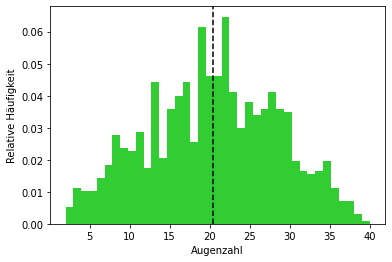

Arithmetisches Mittel:  20.42 
Empirische Standardabweichung:  8.31874990608565


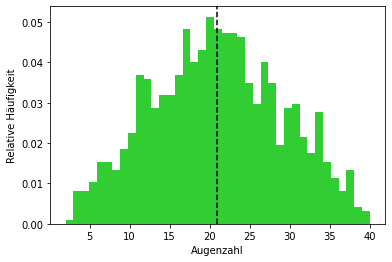

Arithmetisches Mittel:  20.917 
Empirische Standardabweichung:  8.317217743933364


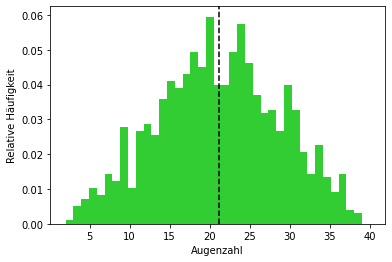

Arithmetisches Mittel:  21.15 
Empirische Standardabweichung:  7.850063694009113
Drei Zufallsexperimente mit 1000 Würfelwürfen mit fünf 20-seitigen Würfeln


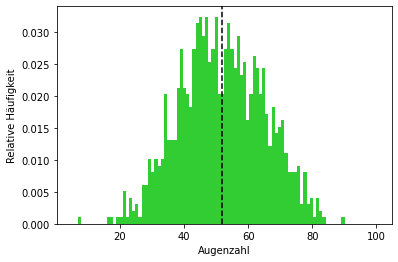

Arithmetisches Mittel:  51.827 
Empirische Standardabweichung:  13.248361068449183


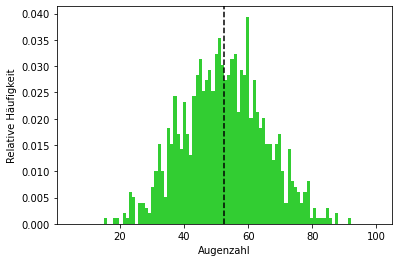

Arithmetisches Mittel:  52.479 
Empirische Standardabweichung:  12.83438970111162


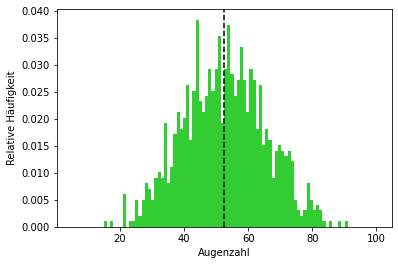

Arithmetisches Mittel:  52.557 
Empirische Standardabweichung:  12.9738487350516
Drei Zufallsexperimente mit 1000 Würfelwürfen mit zehn 20-seitigen Würfeln


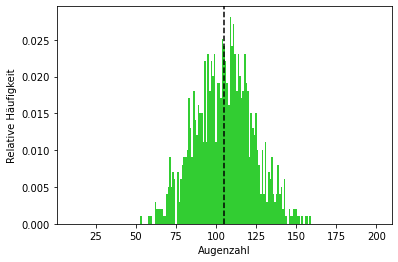

Arithmetisches Mittel:  105.229 
Empirische Standardabweichung:  18.077847189308798


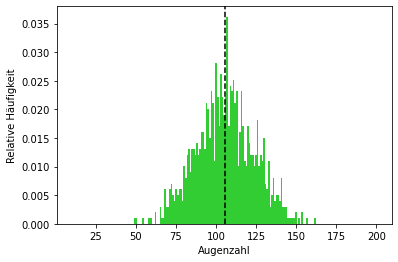

Arithmetisches Mittel:  105.697 
Empirische Standardabweichung:  18.15943806949984


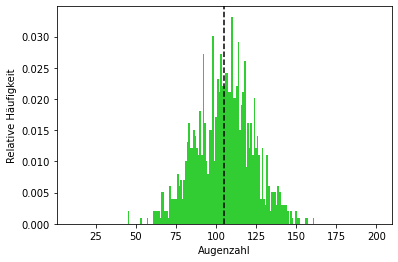

Arithmetisches Mittel:  105.197 
Empirische Standardabweichung:  17.951216978244123


In [40]:
#Aufgabe 1d)
print(f'Drei Zufallsexperimente mit {1000} Würfelwürfen mit zwei {20}-seitigen Würfeln')
dice4_1 = dice(n=1000, m=2, k=20) #Ergebnisse für 2 Würfel
dice4_2 = dice(n=1000, m=2, k=20)
dice4_3 = dice(n=1000, m=2, k=20)
print(f'Drei Zufallsexperimente mit {1000} Würfelwürfen mit fünf {20}-seitigen Würfeln')
dice5_1 = dice(n=1000, m=5, k=20) #Ergebnisse für 5 Würfel
dice5_2 = dice(n=1000, m=5, k=20)
dice5_3 = dice(n=1000, m=5, k=20)
print(f'Drei Zufallsexperimente mit {1000} Würfelwürfen mit zehn {20}-seitigen Würfeln')
dice6_1 = dice(n=1000, m=10, k=20) #Ergebnisse für 10 Würfel
dice6_2 = dice(n=1000, m=10, k=20)
dice6_3 = dice(n=1000, m=10, k=20)

In [41]:
#Auswertung Mittelwert für 2 Würfel:
MW2 = (dice4_1[1] + dice4_2[1] + dice4_3[1]) / 3
S2 = (dice4_1[2] + dice4_2[2] + dice4_3[2]) / 3
THEO_MW2 = 10.5*2
THEO_S2 =  math.sqrt(2 * 133/4)

ABW_MW2 = abs( MW2/THEO_MW2 - 1 ) * 100
ABW_S2 = abs( S2/THEO_S2 - 1 ) * 100

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {1000} Würfen von zwei 20 seitigen Würfels sind: {dice4_1[1]}, {dice4_2[1]}, {dice4_3[1]}')
print(f'Die drei experimentellen Werte für die Standardabweichung bei {1000} Würfen von zwei 20 seitigen Würfels sind: {dice4_1[2]:.4f}, {dice4_2[2]:.4f}, {dice4_3[2]:.4f}')
print(f'Die Mittelwerte und Standardabweichungen der experimentellen Ergebnisse bei {1000} Würfen:')
print(f'\tMittelwert der experimentellen arithmetischen Mittelwerte: {MW2:.4f}')
print(f'\tMittelwert der experimentellen Empirischen Standardabweichungen: {S2:.4f}')
print(f'\tDas arithmetische Mittel weicht um {ABW_MW2:.4f} % von dem berechneten Erwartungswert ab')
print(f'\tDie Empirische Standardabweichung weicht um {ABW_S2:.4f} % von der errechneten Standardabweichung ab')

Die drei experimentellen Werte für das arithmetische Mittel bei 1000 Würfen von zwei 20 seitigen Würfels sind: 20.42, 20.917, 21.15
Die drei experimentellen Werte für die Standardabweichung bei 1000 Würfen von zwei 20 seitigen Würfels sind: 8.3187, 8.3172, 7.8501
Die Mittelwerte und Standardabweichungen der experimentellen Ergebnisse bei 1000 Würfen:
	Mittelwert der experimentellen arithmetischen Mittelwerte: 20.8290
	Mittelwert der experimentellen Empirischen Standardabweichungen: 8.1620
	Das arithmetische Mittel weicht um 0.8143 % von dem berechneten Erwartungswert ab
	Die Empirische Standardabweichung weicht um 0.0890 % von der errechneten Standardabweichung ab


In [42]:
#Auswertung Mittelwert für 5 Würfel:
MW5 = (dice5_1[1] + dice5_2[1] + dice5_3[1]) / 3
S5 = (dice5_1[2] + dice5_2[2] + dice5_3[2]) / 3
THEO_MW5 = 10.5*5
THEO_S5 =  math.sqrt(5 * 133/4)

ABW_MW5 = abs( MW5/THEO_MW5 - 1 ) * 100
ABW_S5 = abs( S5/THEO_S5 - 1 ) * 100

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {1000} Würfen von fünf 20 seitigen Würfels sind: {dice5_1[1]}, {dice5_2[1]}, {dice5_3[1]}')
print(f'Die drei experimentellen Werte für die Standardabweichung bei {1000} Würfen von fünf 20 seitigen Würfels sind: {dice5_1[2]:.4f}, {dice5_2[2]:.4f}, {dice5_3[2]:.4f}')
print(f'Die Mittelwerte und Standardabweichungen der experimentellen Ergebnisse bei {1000} Würfen:')
print(f'\tMittelwert der experimentellen arithmetischen Mittelwerte: {MW5:.4f}')
print(f'\tMittelwert der experimentellen Empirischen Standardabweichungen: {S5:.4f}')
print(f'\tDas arithmetische Mittel weicht um {ABW_MW5:.4f} % von dem berechneten Erwartungswert ab')
print(f'\tDie Empirische Standardabweichung weicht um {ABW_S5:.4f} % von der errechneten Standardabweichung ab')

Die drei experimentellen Werte für das arithmetische Mittel bei 1000 Würfen von fünf 20 seitigen Würfels sind: 51.827, 52.479, 52.557
Die drei experimentellen Werte für die Standardabweichung bei 1000 Würfen von fünf 20 seitigen Würfels sind: 13.2484, 12.8344, 12.9738
Die Mittelwerte und Standardabweichungen der experimentellen Ergebnisse bei 1000 Würfen:
	Mittelwert der experimentellen arithmetischen Mittelwerte: 52.2877
	Mittelwert der experimentellen Empirischen Standardabweichungen: 13.0189
	Das arithmetische Mittel weicht um 0.4044 % von dem berechneten Erwartungswert ab
	Die Empirische Standardabweichung weicht um 0.9700 % von der errechneten Standardabweichung ab


In [43]:
#Auswertung Mittelwert für 10 Würfel:
MW10 = (dice6_1[1] + dice6_2[1] + dice6_3[1]) / 3
S10 = (dice6_1[2] + dice6_2[2] + dice6_3[2]) / 3
THEO_MW10 = 10.5*10
THEO_S10 =  math.sqrt(10 * 133/4)

ABW_MW10 = abs( MW10/THEO_MW10 - 1 ) * 100
ABW_S10 = abs( S10/THEO_S10 - 1 ) * 100

print(f'Die drei experimentellen Werte für das arithmetische Mittel bei {1000} Würfen von zehn 20 seitigen Würfels sind: {dice6_1[1]}, {dice6_2[1]}, {dice6_3[1]}')
print(f'Die drei experimentellen Werte für die Standardabweichung bei {1000} Würfen von zehn 20 seitigen Würfels sind: {dice6_1[2]:.4f}, {dice6_2[2]:.4f}, {dice6_3[2]:.4f}')
print(f'Die Mittelwerte und Standardabweichungen der experimentellen Ergebnisse bei {1000} Würfen:')
print(f'\tMittelwert der experimentellen arithmetischen Mittelwerte: {MW10:.4f}')
print(f'\tMittelwert der experimentellen Empirischen Standardabweichungen: {S10:.4f}')
print(f'\tDas arithmetische Mittel weicht um {ABW_MW10:.4f} % von dem berechneten Erwartungswert ab')
print(f'\tDie Empirische Standardabweichung weicht um {ABW_S10:.4f} % von der errechneten Standardabweichung ab')

Die drei experimentellen Werte für das arithmetische Mittel bei 1000 Würfen von zehn 20 seitigen Würfels sind: 105.229, 105.697, 105.197
Die drei experimentellen Werte für die Standardabweichung bei 1000 Würfen von zehn 20 seitigen Würfels sind: 18.0778, 18.1594, 17.9512
Die Mittelwerte und Standardabweichungen der experimentellen Ergebnisse bei 1000 Würfen:
	Mittelwert der experimentellen arithmetischen Mittelwerte: 105.3743
	Mittelwert der experimentellen Empirischen Standardabweichungen: 18.0628
	Das arithmetische Mittel weicht um 0.3565 % von dem berechneten Erwartungswert ab
	Die Empirische Standardabweichung weicht um 0.9419 % von der errechneten Standardabweichung ab


In [44]:
#Auswertung Standardabweichung für 2 Würfel
S_MW2 = np.sqrt( (S2 - dice4_1[2])**2 + (S2 - dice4_2[2])**2 + (S2 - dice4_3[2])**2 )
S_S2 = np.sqrt( (S2 - dice4_1[2])**2 + (S2 - dice4_2[2])**2 + (S2 - dice4_3[2])**2 )

print(f'Die Standardabweichungen der experimentellen Werte bei {1000} Würfen von zwei 20-seitigen Wüfeln:')
print(f'\tStandardabweichung der empirischen Mittelwerte der Zufallsexperimente: {S_MW2:.4f}')
print(f'\tEmpirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: {S_S2:.4f}')

Die Standardabweichungen der experimentellen Werte bei 1000 Würfen von zwei 20-seitigen Wüfeln:
	Standardabweichung der empirischen Mittelwerte der Zufallsexperimente: 0.3821
	Empirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: 0.3821


In [45]:
#Auswertung Standardabweichung für 5 Würfel
S_MW5 = np.sqrt( (S2 - dice5_1[2])**2 + (S5 - dice5_2[2])**2 + (S5 - dice5_3[2])**2 )
S_S5 = np.sqrt( (S2 - dice5_1[2])**2 + (S5 - dice5_2[2])**2 + (S5 - dice5_3[2])**2 )

print(f'Die Standardabweichungen der experimentellen Werte bei {1000} Würfen von fünf 20-seitigen Wüfeln:')
print(f'\tStandardabweichung der empirischen Mittelwerte der Zufallsexperimente: {S_MW5:.4f}')
print(f'\tEmpirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: {S_S5:.4f}')

Die Standardabweichungen der experimentellen Werte bei 1000 Würfen von fünf 20-seitigen Wüfeln:
	Standardabweichung der empirischen Mittelwerte der Zufallsexperimente: 5.0899
	Empirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: 5.0899


In [46]:
#Auswertung Standardabweichung für 10 Würfel
S_MW10 = np.sqrt( (S10 - dice6_1[2])**2 + (S10 - dice6_2[2])**2 + (S10 - dice6_3[2])**2 )
S_S10 = np.sqrt( (S10 - dice6_1[2])**2 + (S10 - dice6_2[2])**2 + (S10 - dice6_3[2])**2 )

print(f'Die Standardabweichungen der experimentellen Werte bei {1000} Würfen von zehn 20-seitigen Wüfeln:')
print(f'\tStandardabweichung der empirischen Mittelwerte der Zufallsexperimente: {S_MW10:.4f}')
print(f'\tEmpirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: {S_S10:.4f}')

Die Standardabweichungen der experimentellen Werte bei 1000 Würfen von zehn 20-seitigen Wüfeln:
	Standardabweichung der empirischen Mittelwerte der Zufallsexperimente: 0.1484
	Empirische Standardabweichung der empirischen Standardabweichungen der Zufallsexperimente: 0.1484


# Aufgabe 1e) 
Ja, die Werte entsprachen unseren Erwartungen. Die theoretisch berechneten Werte unterscheiden sich bei den hier durch gerecheneten Beispielversuchen erst
in der ersten Nachkommastelle. Folglich sind wohl Theorie und experimentelle Umsetzung korrekt durchgeführt worden, da sich die Ergebnise, bis auf ebenjene Abweichungen, gleichen.

Die Ergebnisse der durchgeführten Versuche wurden wiedererwartens nicht konstant mit steigender Durchführungszahl immer genauer.
Die Abweichungen beim wiederholten Werfen des 20-seitigen Würfels waren bei manchen Durchführungen für 100 Würfe kleiner als für manche der Durchführungen mit 1000 oder sogar 10000 Würfen!
Ebenso gibt es bei den berechneten Standardabweichungen Ausreißer.
Trotzdem lässt sich aus den Experimenten der Trend ableiten, das für mehr Durchführungen des Experiments die Ergebnisse immer genauer werden. Ganz nach dem Gesetz der großen Zahlen.
Um also aus Experimenten Gesetzmäßigkeiten herzuleiten oder theoretische Berechnungen zu bestätigen,
ist es also unbedingt von Vorteil möglichst viele Experimente durchzuführen um einen möglichst genauen Mittelwert zum vergleichen zu bestimmen.

Die Ergebnisse der Versuche mit mehreren Würfeln entsprechen größtenteils unseren Erwartungen.
Die experimentellen Werte liegen mit einer Genauigkeit von weniger als 1% bei den Berechneten.
Auch hier werden die Ergebnisse bei mehr Würfeln genauer, die Mittelwerte und empirischen Standardabweichungen liegen tendenziell näher an den berechneten Erwartungswerten beziehungsweise Standardabweichungen,
Es fällt auch auf, dass die Histogramme bei mehr Würfeln weniger "glatt" werden, d.h. benachbarte Bins unterscheiden sich oft stärker voneinander, je mehr Würfel geworfen werden.
Es liegt daran, dass es bei mehr Würfeln entsprechend mehr Bins gibt, aber die Anzahl der Würfe gleich bleibt.
Dadurch werden alle Bins seltener getroffen, und sie unterschieden sich möglicherweise stärker von ihren entsprechenden theoretischen Werten.

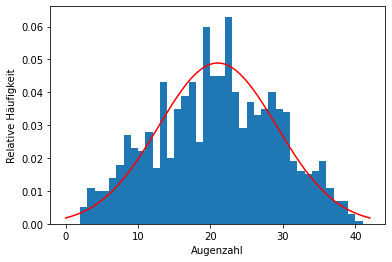

chi-Quadrat: 0.09579167104933525


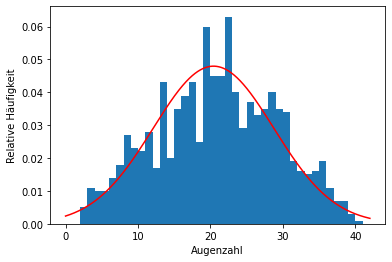

chi-Quadrat: 0.08063874424429567


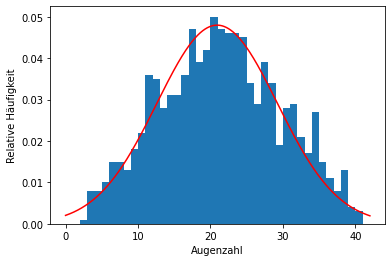

chi-Quadrat: 0.05573548242722186


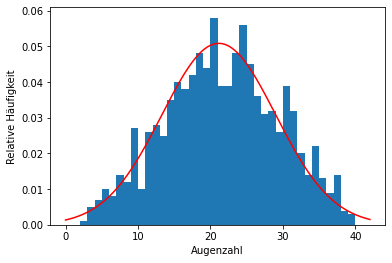

chi-Quadrat: 0.06055946083958457


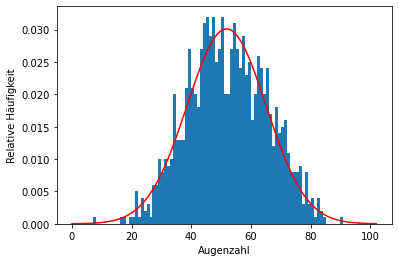

chi-Quadrat: 0.07649643812356109


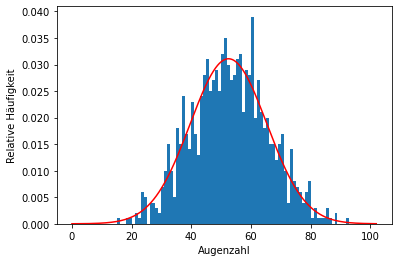

chi-Quadrat: 0.08622046229122578


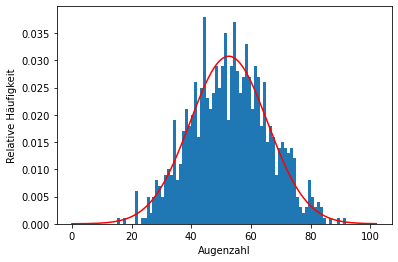

chi-Quadrat: 0.09098584237503285


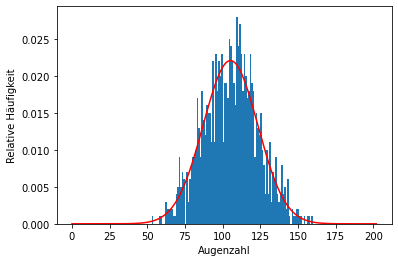

chi-Quadrat: 0.1022123908325371


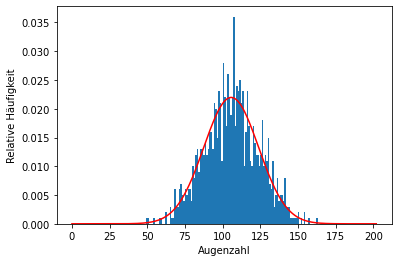

chi-Quadrat: 0.10644816678605913


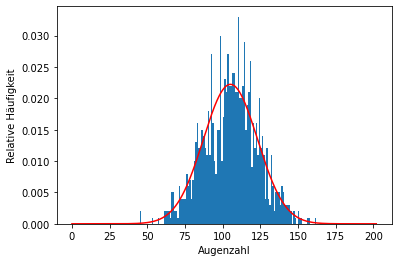

chi-Quadrat: 0.16565990200738576


In [47]:
#Aufgabe 1f)
# Beispielhafter theoretischer Wert für 2 Würfel
chi_squared(dice4_1, sigma = math.sqrt(2 * 133/4), mu = 10.5*2)
# Experimentelle Werte für 2 Würfel
chi_squared(dice4_1, sigma = dice4_1[2], mu = dice4_1[1])
chi_squared(dice4_2, sigma = dice4_2[2], mu = dice4_2[1])
chi_squared(dice4_3, sigma = dice4_3[2], mu = dice4_3[1])
# Experimentelle Werte für 5 Würfel
chi_squared(dice5_1, sigma = dice5_1[2], mu = dice5_1[1])
chi_squared(dice5_2, sigma = dice5_2[2], mu = dice5_2[1])
chi_squared(dice5_3, sigma = dice5_3[2], mu = dice5_3[1])
# Experimentelle Werte für 10 Würfel
chi_squared(dice6_1, sigma = dice6_1[2], mu = dice6_1[1])
chi_squared(dice6_2, sigma = dice6_2[2], mu = dice6_2[1])
chi_squared(dice6_3, sigma = dice6_3[2], mu = dice6_3[1])

# 1 f)
Den besten Fit an experimentelle Datenwerte, also das kleinste χ2 erhält man, wenn man die aus dem Datensatz errechnete Standardabweichung und Mittelwert einsetzt.
Das ist besser als der theoretische Wert oder der Durchschnitt der experimentellen Standardabweichungen und Mittelwerte.
Bei endlichen statistischen Versuchen entspricht das Ergebnis einer Messreihe nie exakt dem theoretischen Wert. Den besten Fit erhält man dann natürlich durch die
aus ihm selbst berechneten Werte

Für mehr Würfel wird das χ2 größer, da bei gleichbleibender Anzahl an Würfen mehr Bins getroffen werden können. Die mögliche Abweichung vom theoretischen Wert pro Bin also größer wird.
Die experimentelle Datenmenge ist dadurch weiter von der theroetischen Gaußverteilung entfernt und kann deswegen auch nicht so gut mit einer Gaußfunktion approximiert werden.
Deutlich hier weil χ2 für 2 Würfel kleiner ist als für 5 und für 5 Würfel kleiner als für 10.
Mit mehr Würfen, also mehr Durchführungen des Versuchs, würde sich das χ2 auch hier, bei mehr Würfeln, wieder kleiner werden.

# Aufgabe 1g)
## i) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels mindestens einmal die 20 fällt?
Wir betrachten die Wahrscheinlichkeit das die 20 überhaupt nicht fällt.
In jedem Wurf bleiben von den 20 Möglichkeiten noch 19 übrig. <br>
q ist damit = (1 - p)**10 = (19/20)**10<br>
Die gesuchte Wahrscheinlichkeit ist dann p = 1 - q = 1 - (19/20)**10 ≈ 0.401 

## ii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels höchstens 2 mal die 1 fällt?
Die Wahrscheinlichkeit auf eine 1 ist p = 1/20 <br>
Wir betrachten nun die Wahrscheinlichkeiten das die Eins 0 mal, 1 mal oder 2 mal gewürfelt wird. <br>
Die Wahrscheinlichkeit das bei n Würfen die Zahl, mit Wahrscheinlichkeit p, genau k-mal vorkommt ist: <br>
$p(x=k) = n!/(k! * (n-k)!) * p**k * (1-p)**(n-k)$

Die Wahrscheinlichkeit das die gar nicht 1 fällt ist $(19/20)**10 ≈ 0.599$ <br>
$p(k=0) = math.factorial(10)/(math.factorial(0) * math.factorial(10-0)) * (1/20)**0 * (1-1/20)**(10-0) ≈ 0.599$ <br>
$p(k=1) = math.factorial(10)/(math.factorial(1) * math.factorial(10-1)) * (1/20)**1 * (1-1/20)**(10-1) ≈ 0.315$ <br>
$p(k=2) = math.factorial(10)/(math.factorial(2) * math.factorial(10-2)) * (1/20)**2 * (1-1/20)**(10-2) ≈ 0.075$ <br>

Die gesuchte Wahrscheinlichkeit ist damit $P = p(k=0) + p(k=1) + p(k=2) ≈ 0.988496$

## iii) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels genau 3 mal die 5 fällt?
Die Wahrscheinlichkeit das genau 3 mal die 5 fällt lässt sich mit der Formel aus Aufgabenteil ii) berechnen <br>
$p(k=3) = math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) ≈ 0.0105$

## iv) Wie hoch ist die Wahrscheinlichkeit, dass beim 10-maligen Werfen eines 20-seitigen Würfels genau 3 mal die 5 UND höchstens 2 mal die 1
Die beiden Ereignisse ii) und iii) sind stochastisch abhängig: <br>
Damit das Ereignis eintritt müssen 3 Würfel eine 5 zeigen. Die übrigen 7 Würfel können nun 0, 1 oder 2 Einsen zeigen. <br>
Also p(iii) * (p(k=0) + p(k=1) + p(k=2)) <br>
math.factorial(10)/(math.factorial(3) * math.factorial(10-3)) * (1/20)**3 * (1-1/20)**(10-3) * ( <br>
    math.factorial(7)/(math.factorial(0) * math.factorial(7-0)) * (1/20)**0 * (1-1/20)**(7-0) + <br>
    math.factorial(7)/(math.factorial(1) * math.factorial(7-1)) * (1/20)**1 * (1-1/20)**(7-1) + <br>
    math.factorial(7)/(math.factorial(2) * math.factorial(7-2)) * (1/20)**2 * (1-1/20)**(7-2)) <br>
≈ 0.01043570419298467